In [19]:
# importing packages
import pandas as pd
import numpy as np
from numpy import array
import matplotlib
import matplotlib as mpl
from matplotlib import rc
import seaborn as sns
from matplotlib.patches import Patch
# for plots
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
from sys import exit
from shapely.geometry import Point
from geopandas import GeoDataFrame as gdf
from shapely.geometry import Point, LineString
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
import shapefile as shp
from matplotlib import gridspec
import geoplot as gplt
import proplot
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import json
from functools import partial
from shapely.geometry import box, mapping
%matplotlib inline


In [20]:
file_path = "P:\\G\\1.1 research\\files_excel\\plotting.xlsx"
# Read the Excel file
df= pd.read_excel(file_path, sheet_name="trends")
df1 = pd.read_csv('P:\\G\\1.1 research\\analysis\\trends\\ADF test.csv')
df1

lon    lat  lag       ADF   p-value  h             hyp  \
0     68.00  23.75    0 -5.655536  0.010000  0      Stationary   
1     68.00  24.00    0 -5.494734  0.010000  0      Stationary   
2     68.25  23.50    0 -6.091725  0.010000  0      Stationary   
3     68.25  23.75    0 -5.824543  0.010000  0      Stationary   
4     68.25  24.00    0 -5.647493  0.010000  0      Stationary   
...     ...    ...  ...       ...       ... ..             ...   
4938  97.00  27.50    0 -2.639686  0.310484  1  Non Stationary   
4939  97.00  27.75    0 -2.629647  0.314483  1  Non Stationary   
4940  97.00  28.00    0 -2.624188  0.316658  1  Non Stationary   
4941  97.00  28.25    0 -2.660686  0.302117  1  Non Stationary   
4942  97.25  28.00    0 -1.442823  0.799866  1  Non Stationary   

                  sig  
0         significant  
1         significant  
2         significant  
3         significant  
4         significant  
...               ...  
4938  not significant  
4939  not significant  
4940  not significant  
4941  not significant  
4942  not significant  

[4943 rows x 8 columns]

In [21]:
df2 = df[df.sigL=="Significant"].fillna(0)
df3 = df[df.sigMK=="Significant"]
df4 = df[df.sigSen=="Significant"]



In [26]:
import matplotlib.cm as cm

# Create a colormap
colormap = cm.get_cmap('RdYlBu_r')

# Extract three distinct colors from the colormap
color1 = colormap(0.95)  # Color at position 0.1
color2 = colormap(0.7)  # Color at position 0.5
color3 = colormap(0.15)  # Color at position 0.8
color4 = colormap(0.0)  # Color at position 0.8
custom_palette = ([color1, color2, color3, color4])

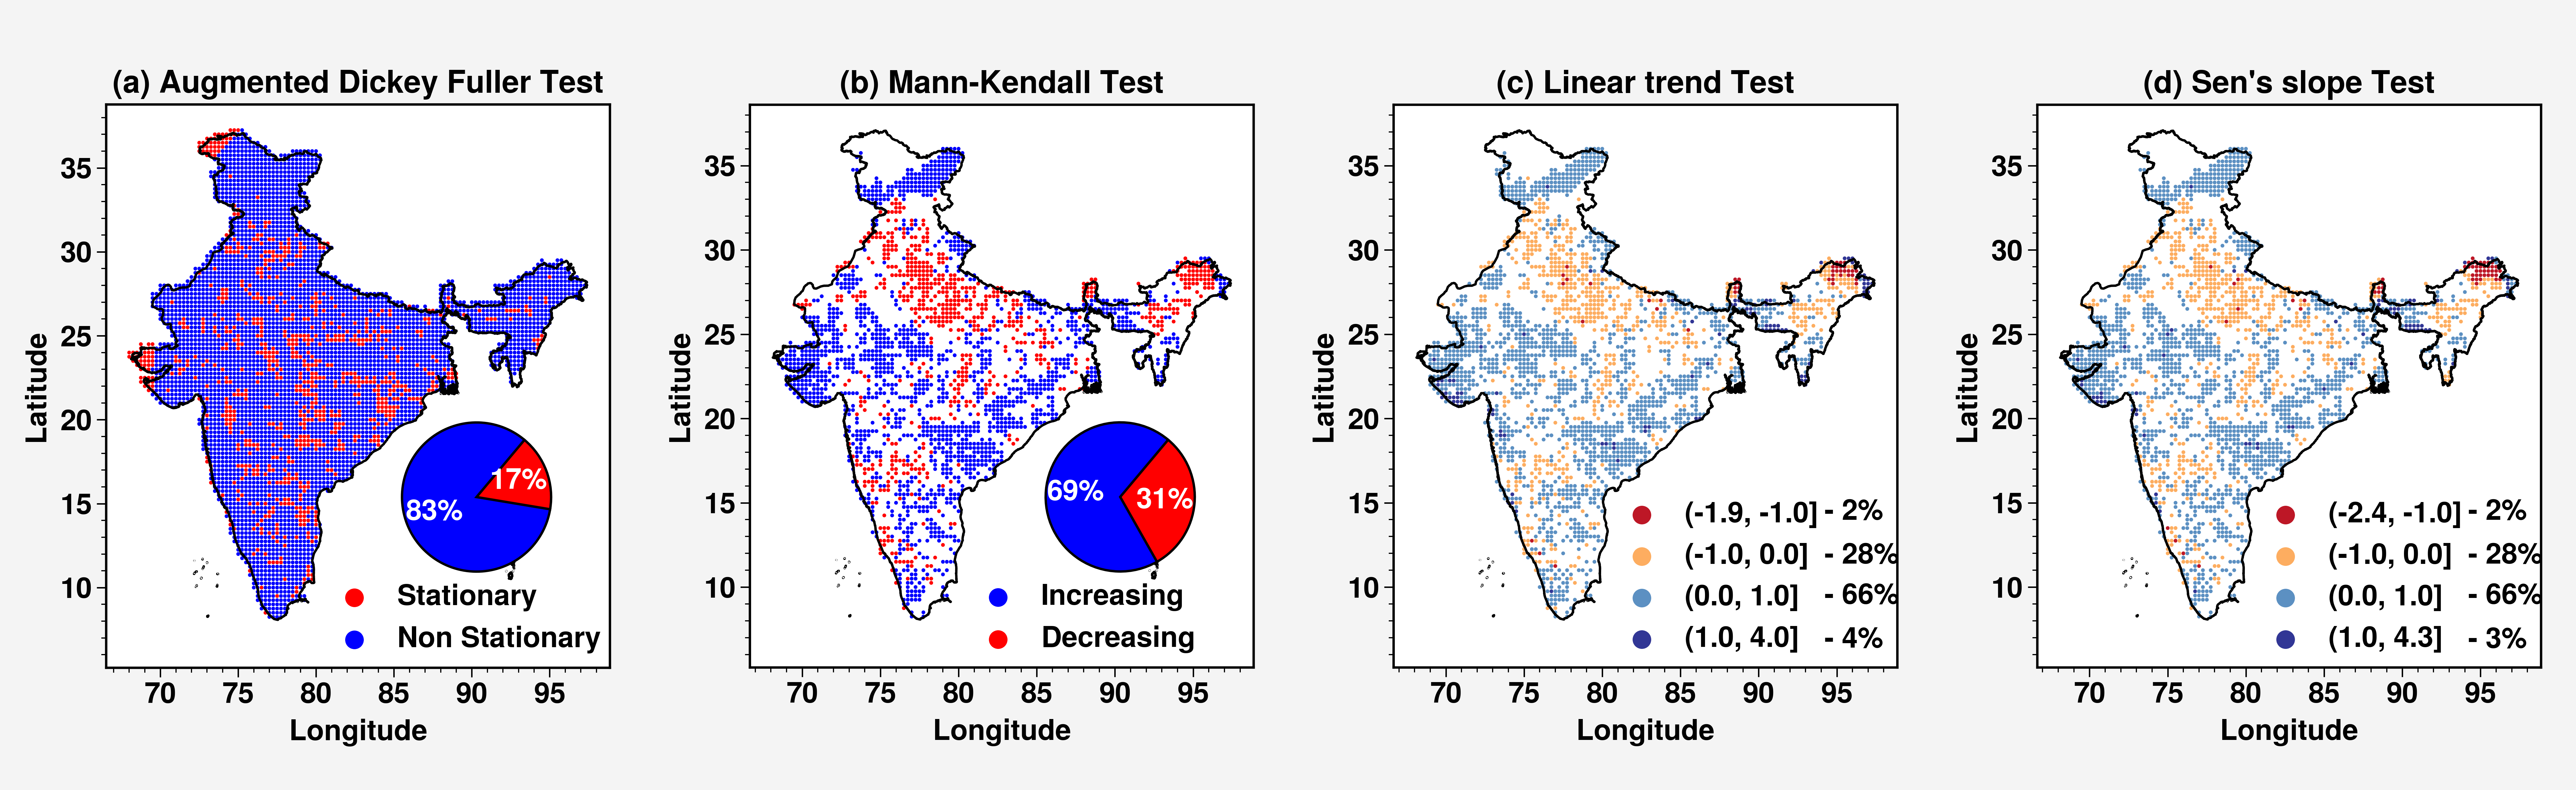

In [27]:
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

# Create a custom color map
custom_cmap = custom_palette

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4.6), dpi=300)

shp1 = gpd.read_file("P:\\G\\SpatialData\\India_Boundary\\india_boundary_WGS1984.shp")

## ADF
sns.scatterplot(data=df1, x="lon", y="lat", hue='hyp', ax= ax[0], 
                palette=["red", "blue"], s = 3)
ax[0].set_title('(a) Augmented Dickey Fuller Test', fontdict={'fontsize': '13', 'fontweight' : 'bold'}, x = 0.5, y=1.0)

## MK
sns.scatterplot(data=df3, x="lon", y="lat", hue='dirMK', ax= ax[1], 
                palette=["blue", "red"], s = 3)
ax[1].set_title('(b) Mann-Kendall Test', fontdict={'fontsize': '13', 'fontweight' : 'bold'}, x = 0.5, y=1.0)

## LR
x1 = pd.cut(df2["slopeL"], bins=[df2["slopeL"].min(), -1, 0, 1, df2["slopeL"].max()], precision=1)
sns.scatterplot(data=df2, x="lon", y="lat", hue=x1, ax=ax[2], palette=custom_palette, s=3)
ax[2].set_title('(c) Linear trend Test', fontdict={'fontsize': '13', 'fontweight': 'bold'}, x=0.5, y=1.0)

## sen
x2 = pd.cut(df4["slopeSen"], bins=[df4["slopeSen"].min(), -1, 0, 1, df4["slopeSen"].max()], precision=1)
sns.scatterplot(data=df4, x="lon", y="lat", hue=x2, ax=ax[3], palette=custom_palette, s=3)
ax[3].set_title("(d) Sen's slope Test", fontdict={'fontsize': '13', 'fontweight': 'bold'}, x=0.5, y=1.0)

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{:.1f}%\n({v:d})'.format(pct, v=val)
    return my_format
#######################
axesIns1 = inset_axes(ax[0], width="100%", height="100%",
                   bbox_to_anchor=(0.55, 0.118, .37, .37),
                   bbox_transform=ax[0].transAxes, loc='lower left', borderpad=0)
axesIns1.tick_params(left=True, right=False, labelleft=True, labelright=False)
axesIns1.grid(False)
s1 = df1['hyp'].value_counts()
axesIns1.pie(s1,labels = None, startangle=50, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'}, autopct='%1.f%%', 
            textprops={'fontsize': 12, 'fontweight':'bold', 'color':'white'}, colors = ["blue", "red"])
##########################
axesIns2 = inset_axes(ax[1], width="100%", height="100%",
                   bbox_to_anchor=(0.55, 0.118, .37, .37),
                   bbox_transform=ax[1].transAxes, loc='lower left', borderpad=0)
axesIns2.tick_params(left=True, right=False, labelleft=True, labelright=False)
axesIns2.grid(False)
s2 = df3['dirMK'].value_counts()
axesIns2.pie(s2,labels = None, startangle=50, wedgeprops={'linewidth': 1.0, 'edgecolor': 'black'}, autopct='%1.f%%', 
            textprops={'fontsize': 12, 'fontweight':'bold', 'color':'white'}, colors = ["blue", "red"])

# Rest of your code
#########################
legend_properties = {'weight':'bold', 'size':12}
for a in [ax[0], ax[1], ax[2], ax[3]]:
    shp1.plot(color = 'None', edgecolor = 'black', ax=a, linewidth=1)
    a.grid(False)
    a.set_xlabel('Longitude', fontsize = 12, fontweight = 'bold')
    a.set_ylabel('Latitude', fontsize = 12, fontweight = 'bold')
    sns.move_legend(a, ncol=1, title=None, loc='lower left', bbox_to_anchor=(0.43, 0.02), frameon=True, prop = legend_properties, 
                borderpad = 0.1, markerscale=1.2,framealpha=1, edgecolor = "white")
    for label in (a.get_xticklabels() + a.get_yticklabels()):
        label.set_fontsize(12)
        label.set_fontweight('bold')
    for axis in ['top','bottom','left','right']:
        a.spines[axis].set_linewidth(1)
        a.spines[axis].set_edgecolor("black")
style = dict(size=12, color='black', fontweight = "bold")
ax[2].text(94.2, 14, "- 2%", **style)
ax[2].text(94.2, 11.4, "- 28%", **style)
ax[2].text(94.2, 9, "- 66%", **style)
ax[2].text(94.2, 6.4, "- 4%", **style)
ax[3].text(94.2, 14, "- 2%", **style)
ax[3].text(94.2, 11.4, "- 28%", **style)
ax[3].text(94.2, 9, "- 66%", **style)
ax[3].text(94.2, 6.4, "- 3%", **style)

fig.tight_layout()        
fig = matplotlib.pyplot.gcf()
plt.show()
fig.savefig('P:\\G\\1.1 research\\result_pics\\1.1 trends.tif', dpi=300)